# 03 - Análise gráfica - Kaggle Titanic

Conjunto de análises gráficas dos dados de treino do Titanic após a realização dos tratamentos.

## Preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.figsize'] = (12, 7)
sns.set_theme(style='darkgrid', palette='tab10')
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Carregando dados

In [3]:
titanic = pd.read_csv('../data/processed/train_processed_byage.csv')
del titanic['Unnamed: 0']
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria
0,0,3,male,22,1,0,SC,S,1,adulto_idoso
1,1,1,female,38,1,0,C,C,1,adulto_idoso
2,1,3,female,26,0,0,SC,S,0,adulto_idoso
3,1,1,female,35,1,0,C,S,1,adulto_idoso
4,0,3,male,35,0,0,SC,S,0,adulto_idoso


## Análise individual

### Sobreviventes

Começo com a contagem geral da proporção de sobreviventes na base de treino.

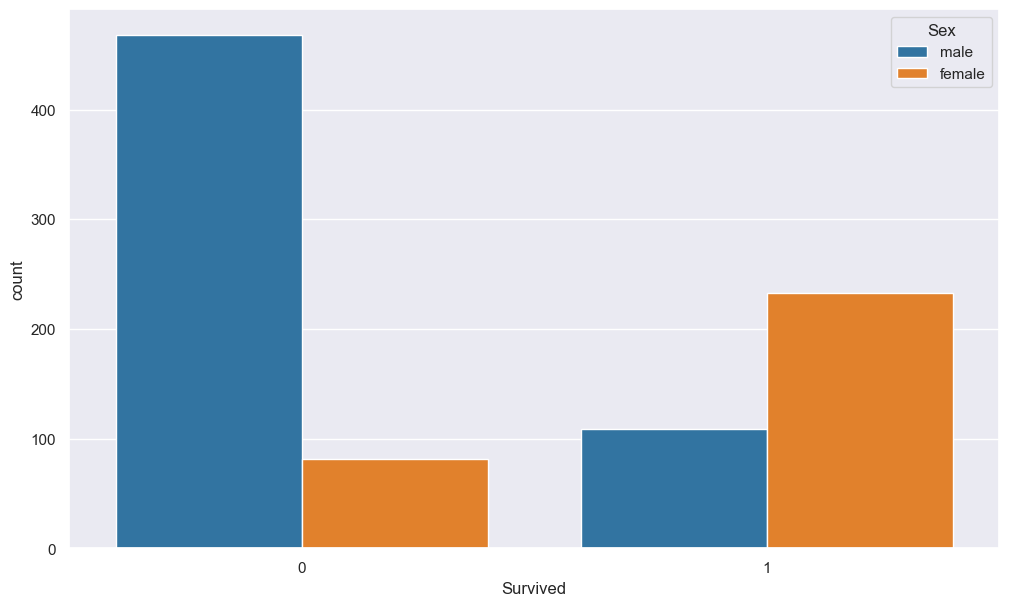

In [4]:
sns.countplot(x = 'Survived', data=titanic, hue='Sex');

### Classe

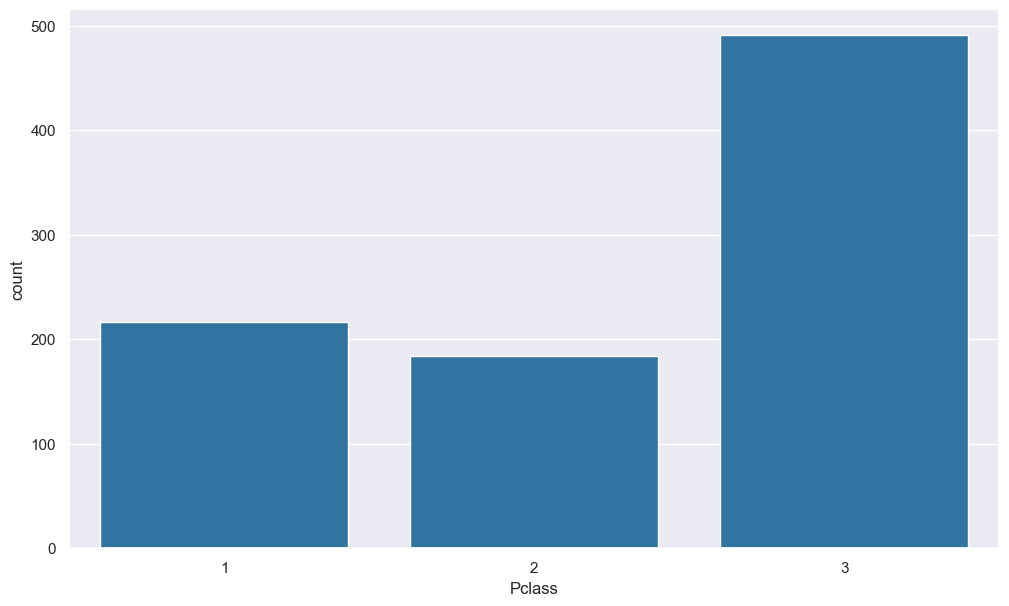

In [5]:
sns.countplot(x = 'Pclass', data=titanic);

A terceira classe possuía pouco mais pessoas que a primeira e segunda combinadas.

### Sexo

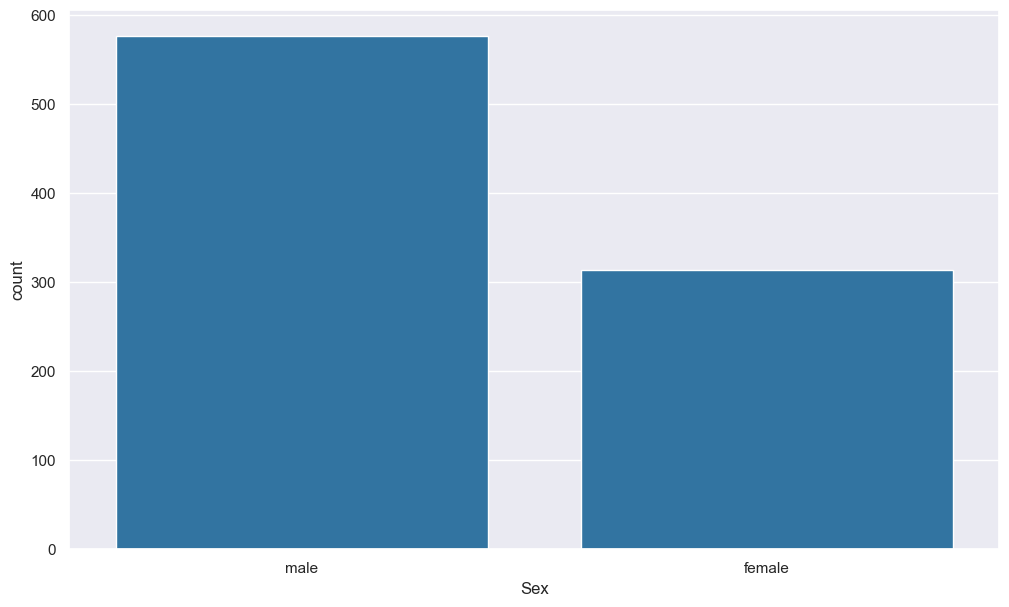

In [6]:
sns.countplot(x = 'Sex', data=titanic);

A maior parte dos integrantes do navio eram homens mas já sabemos que a maioria dos sobreviventes eram mulheres.

### Idade

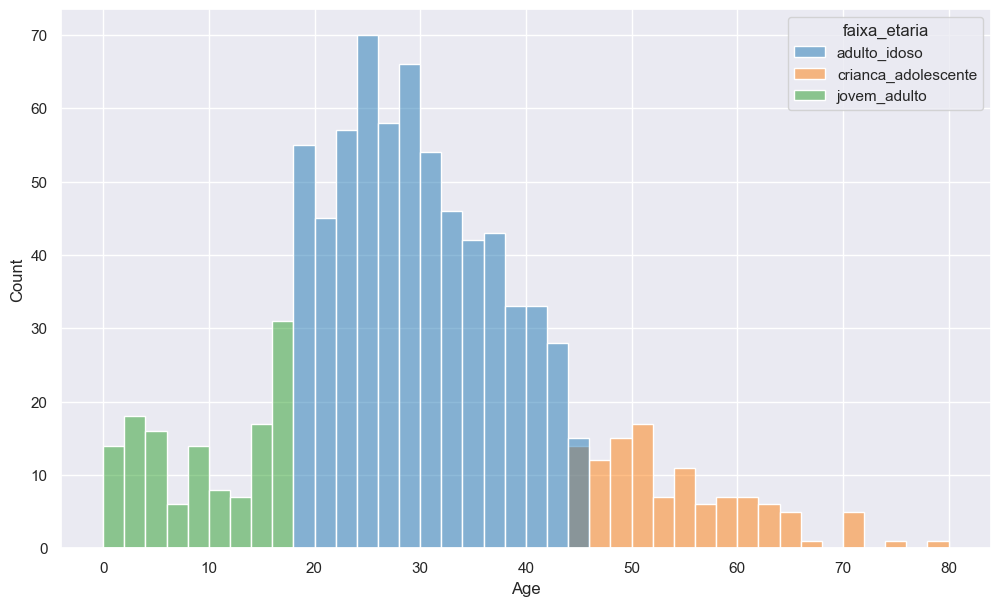

In [7]:
sns.histplot(x='Age', data=titanic, hue='faixa_etaria', bins=40);

A maior parte dos passageiros tinha entre 20 e 45 anos.

### SibSp

Corresponde ao número de irmãos e cônjuges a bordo. Não considera noivos, namorados ou semelhantes, apenas casados.

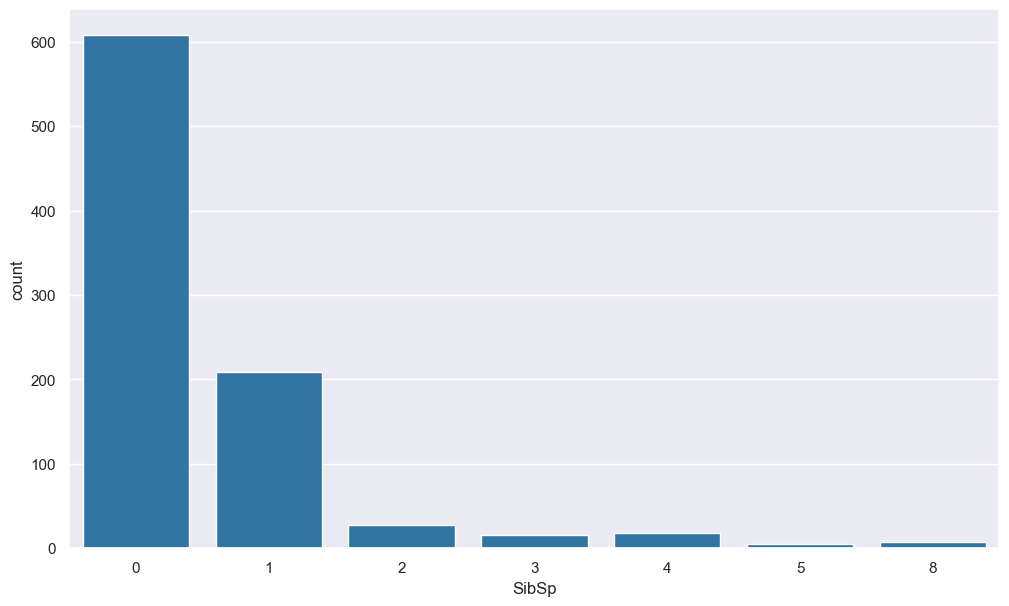

In [8]:
sns.countplot(x='SibSp', data=titanic);

### Parch

Corresponde ao número de pais e filhos acompanhando o passageiro.

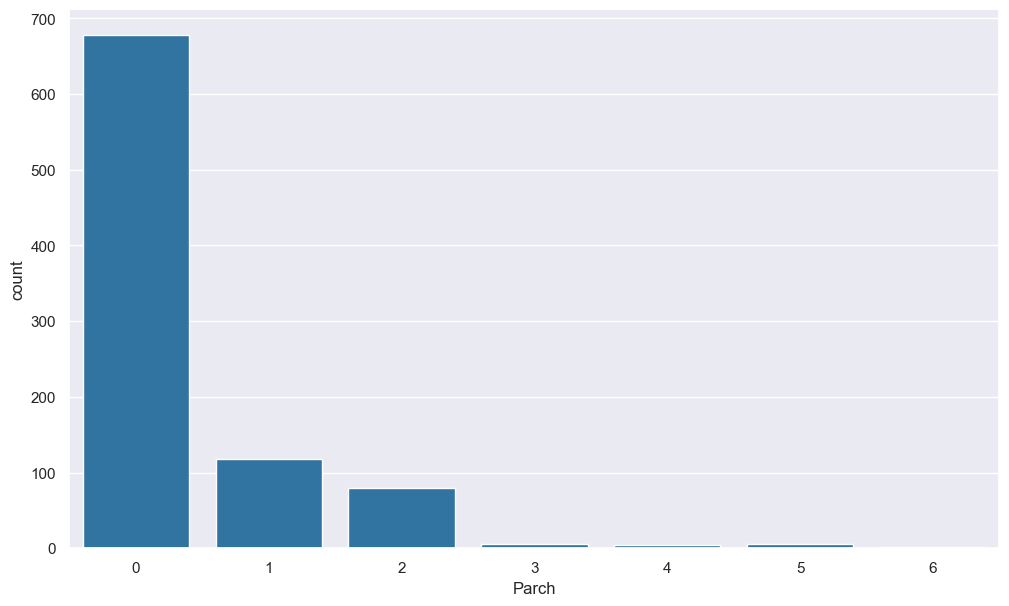

In [9]:
sns.countplot(x='Parch', data=titanic);

### Número total de parentes

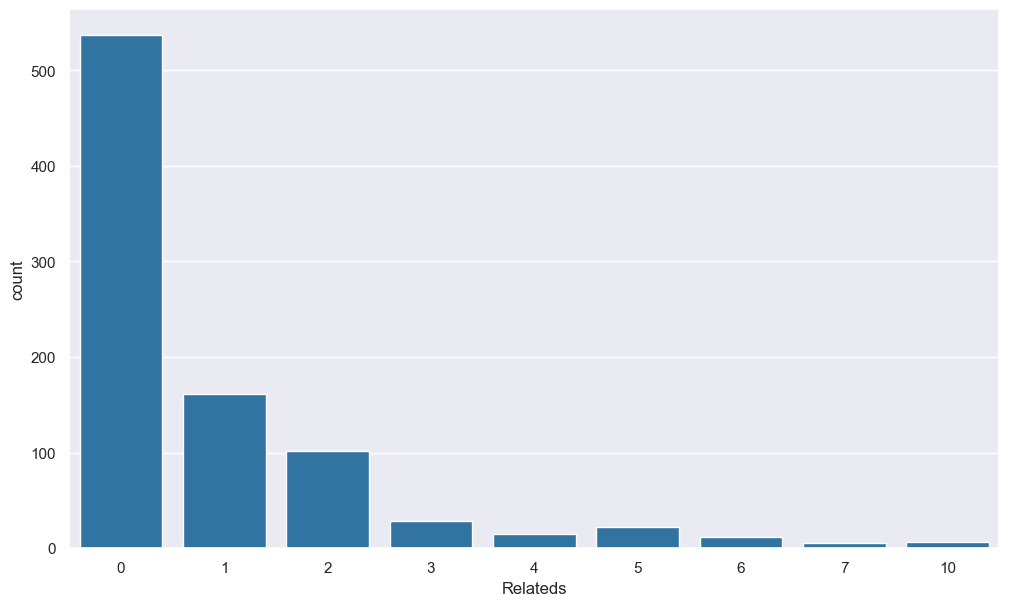

In [10]:
sns.countplot(x='Relateds', data=titanic);

É notável a quantidade de pessoas que estavam sozinhas no navio. O que acontece se compararmos as pessoas sozinhas versos a todas com pelo menos algum acompanhante?

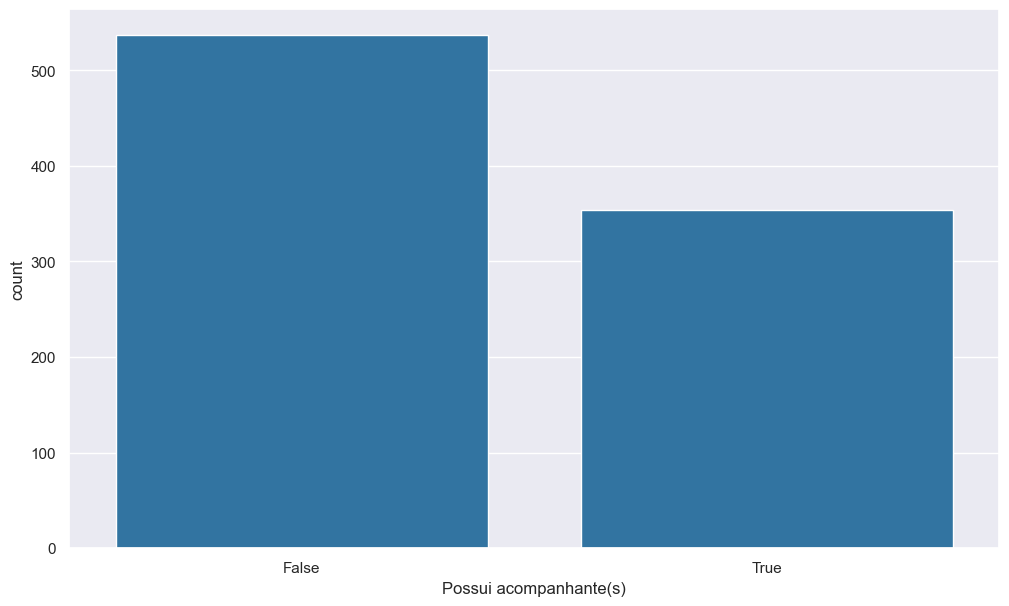

In [11]:
acompanhados = titanic['Relateds'] > 0
sns.countplot(x = acompanhados)
plt.xlabel('Possui acompanhante(s)');

É possível observar que a maior parte não possui acompanhantes, mas que a diferença reduz quando juntamos comparamos com o total de pessoas com pelo menos um acompanhante.

### Andar

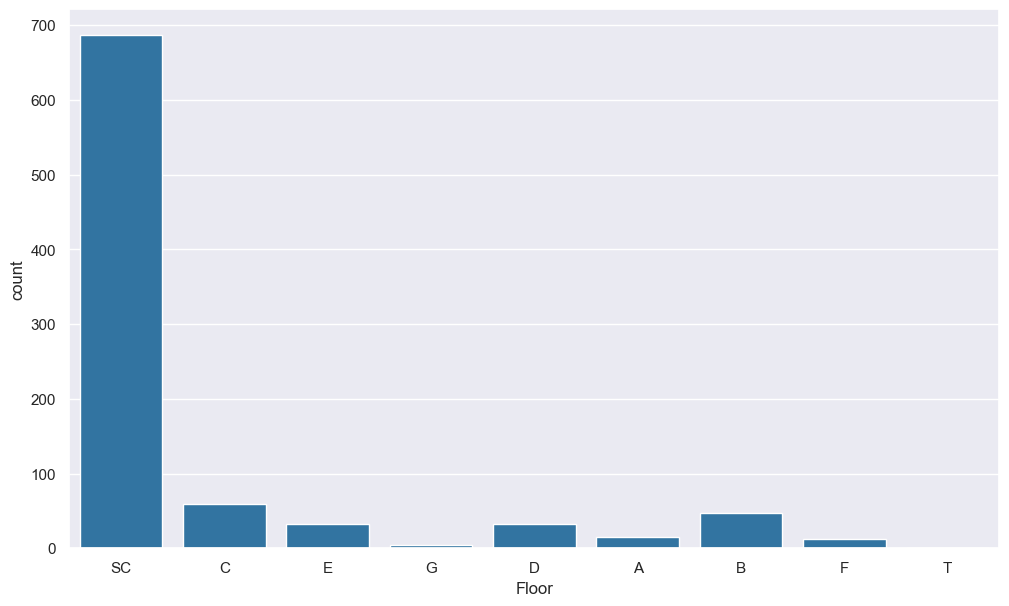

In [12]:
sns.countplot(x='Floor', data=titanic);

A maioria não tinha andar informado, mas dentre os que tinham, a distribuição pode ser melhor vista no gráfico abaixo:

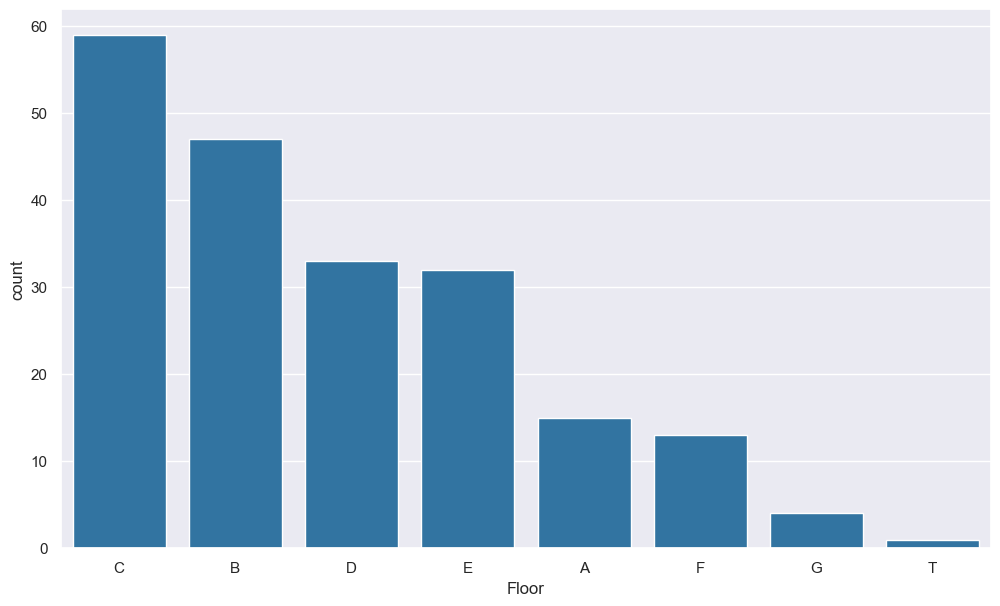

In [13]:
sns.countplot(x='Floor', data=titanic[titanic['Floor'] != 'SC'], order = titanic[titanic['Floor'] != 'SC']['Floor'].value_counts().index);

### Local de embarcação

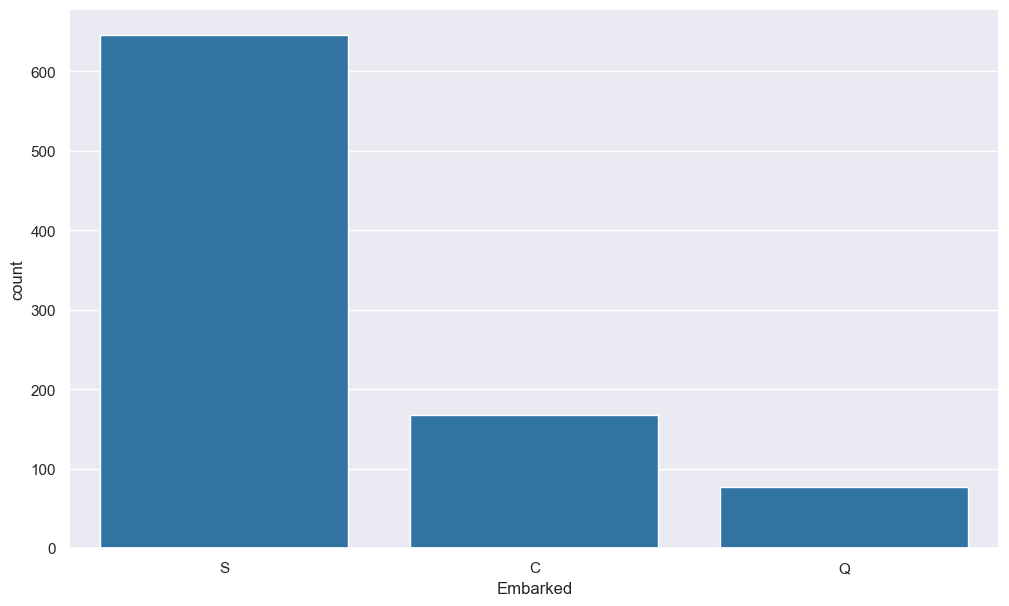

In [14]:
sns.countplot(x='Embarked', data=titanic);

## Análise combinatória: `survived`

Vamos primeiro relembrar a tabela e suas propriedades:

In [15]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria
0,0,3,male,22,1,0,SC,S,1,adulto_idoso
1,1,1,female,38,1,0,C,C,1,adulto_idoso
2,1,3,female,26,0,0,SC,S,0,adulto_idoso
3,1,1,female,35,1,0,C,S,1,adulto_idoso
4,0,3,male,35,0,0,SC,S,0,adulto_idoso


### `Survived` vs `Pclass`

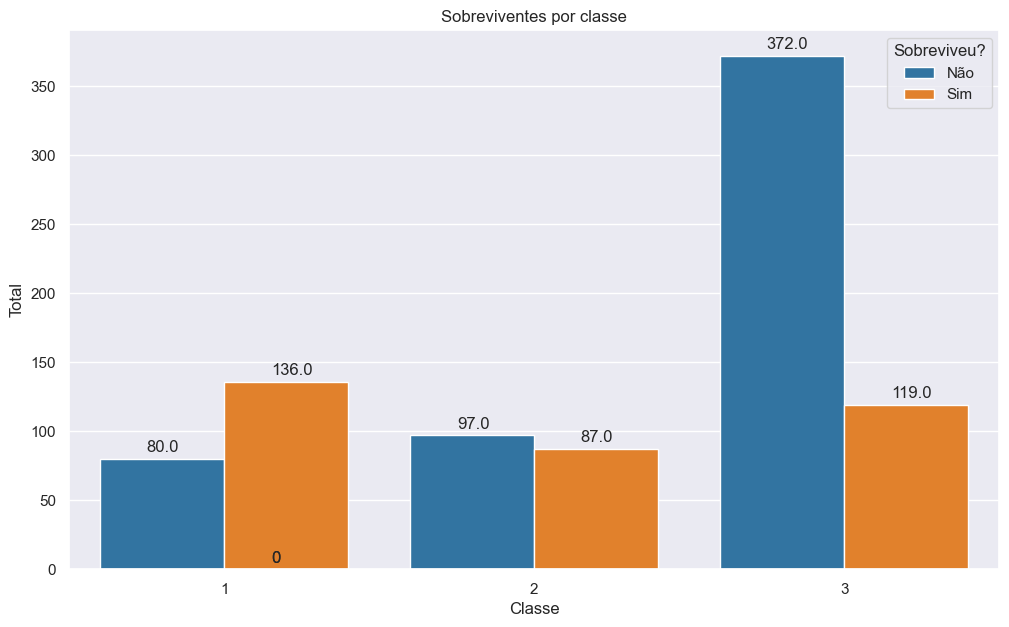

In [16]:
ax = sns.countplot(x = 'Pclass', data=titanic, hue='Survived')
plt.title("Sobreviventes por classe")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('Classe')
plt.ylabel('Total')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

Um número bastante semelhante sobreviveu em cada classe, mas proporcionalmente a terceira classe foi a que mais pessoas morreram. Portanto é possível afirmar que existe uma relação entre a classe e a sobrevivência, especialmente para a terceira classe. 

### `Survived` vs `Sex`

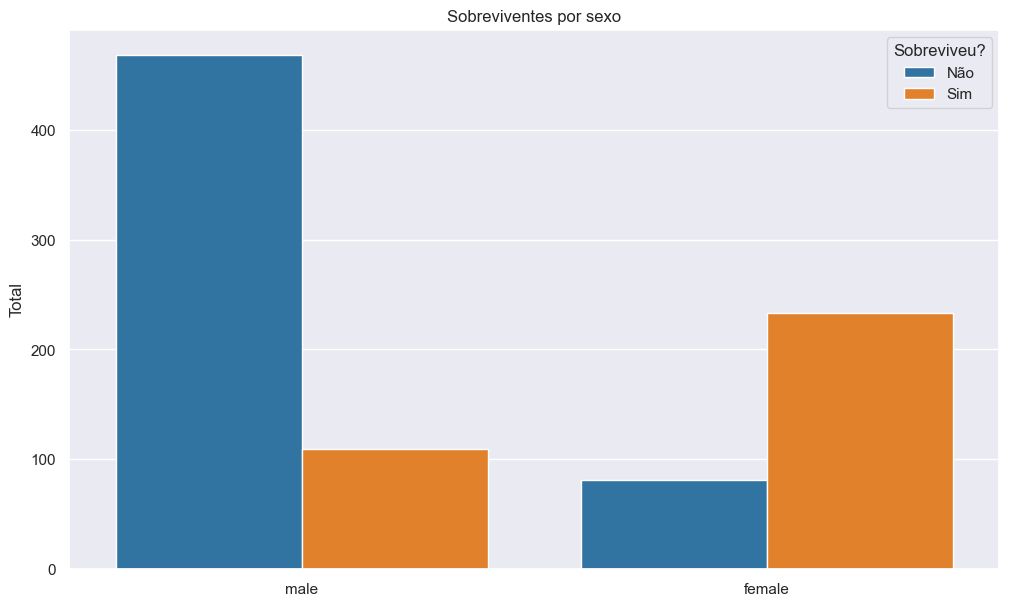

In [17]:
sns.countplot(x = 'Sex', data=titanic, hue='Survived')
plt.title("Sobreviventes por sexo")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Total')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

É notável que tanto proporcionalmente quanto em números absolutos as mulheres sobreviveram muito mais.

`Survived` vs `Sex` vs `Pclass`

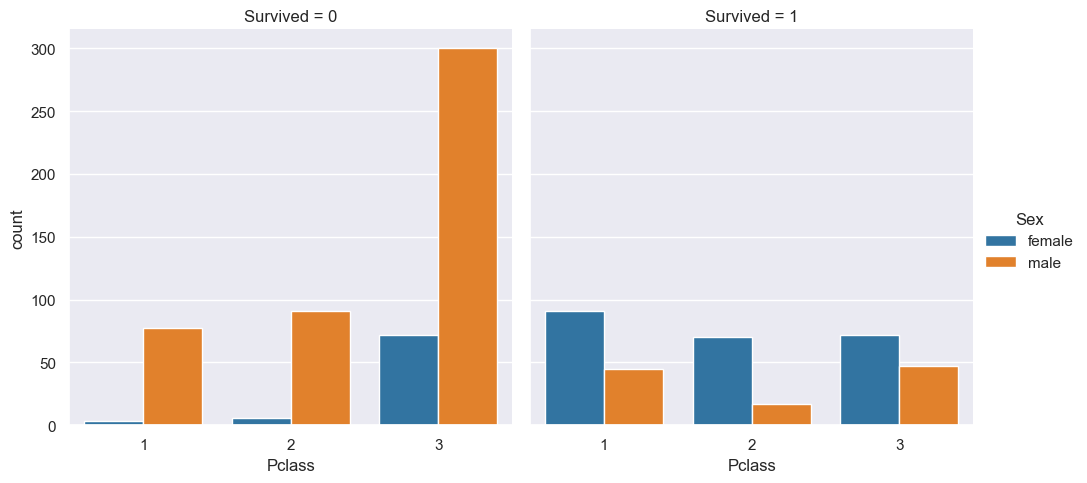

In [18]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=titanic, kind="count");

Em todos os casos a maioria dos que morreram foram homens, existindo certa estabilidade quanto a sobrevivência de mulheres. Com isso, baseado nas análises anteriores de maior presença masculina na terceira classe, o fator predominante para morrer ou não é ser homem ou mulher.

### `Survived` vs `Age`

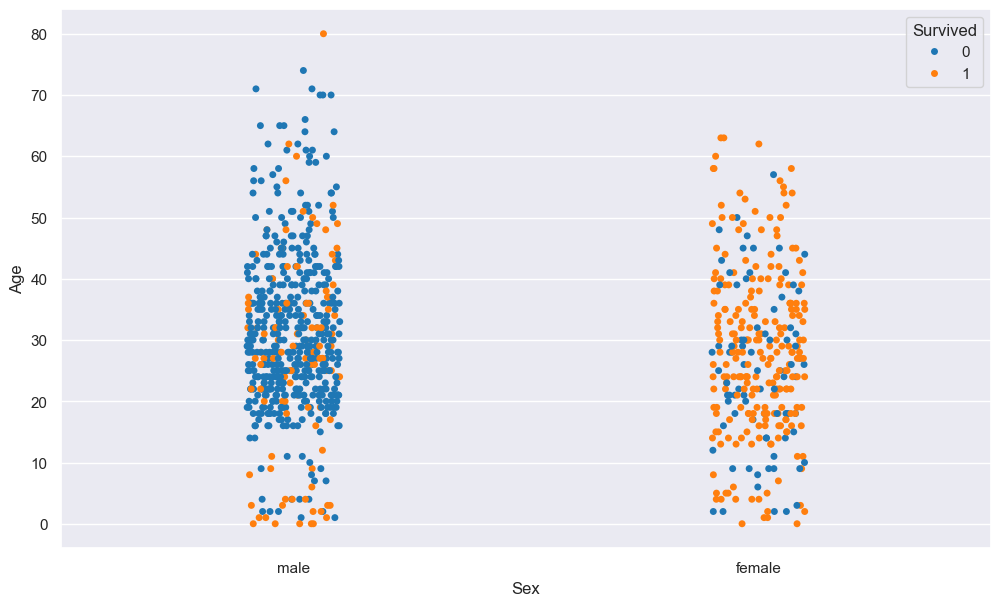

In [19]:
sns.stripplot(y="Age", x="Sex", hue="Survived", data=titanic);

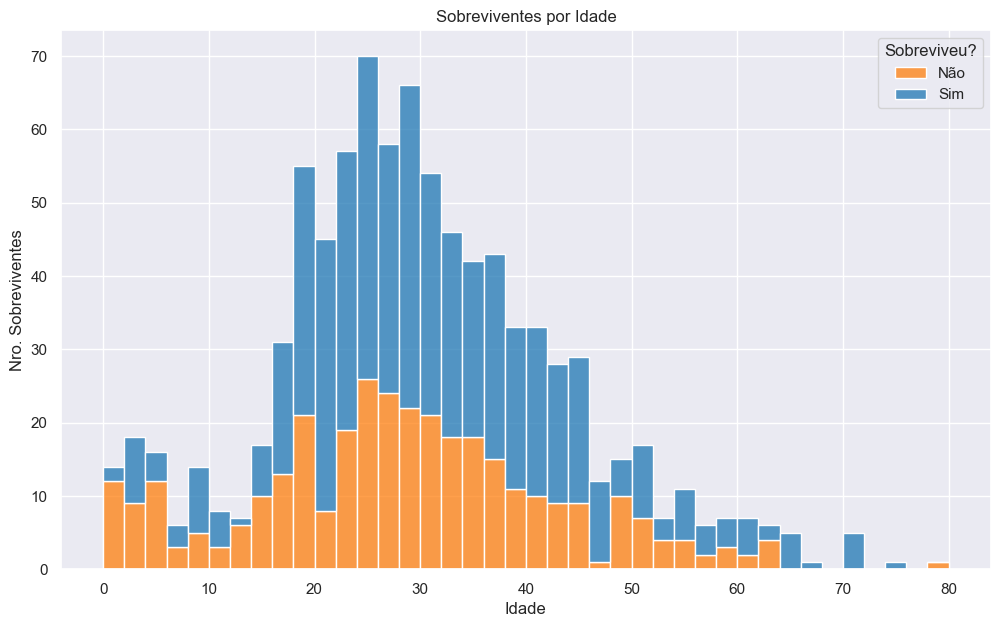

In [20]:
sns.histplot(x='Age', data=titanic, hue='Survived', bins=40, multiple="stack")
plt.title("Sobreviventes por Idade")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('Idade')
plt.ylabel('Nro. Sobreviventes')
plt.show();

Proporcionalmente os mais novos ou mais idosos sobreviveram mais.

### `Survived` vs `faixa_etaria`

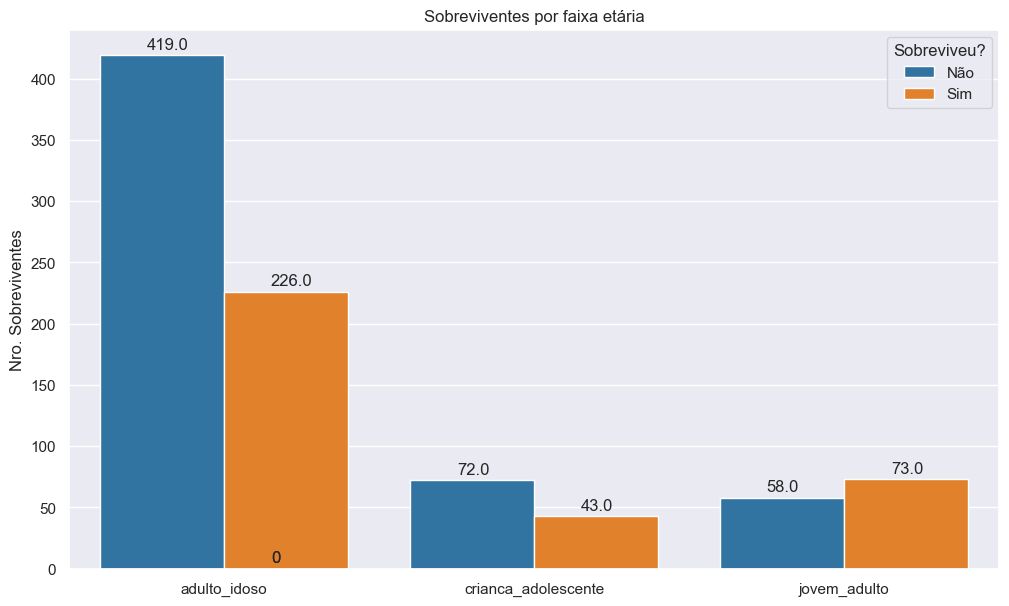

In [21]:
ax = sns.countplot(x = 'faixa_etaria', data=titanic, hue='Survived')
plt.title("Sobreviventes por faixa etária")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

A proporção de sobreviventes para _jovem_adulto_ e _adulto_idoso_ é semelhante (próximo a 50%), mas crianças adolescentes sobreviveram proporcionalmente bem mais. Até agora tudo parece indicar que uma árvore de decisão é um modelo razoável.

### `Survived` vs `SibSp`

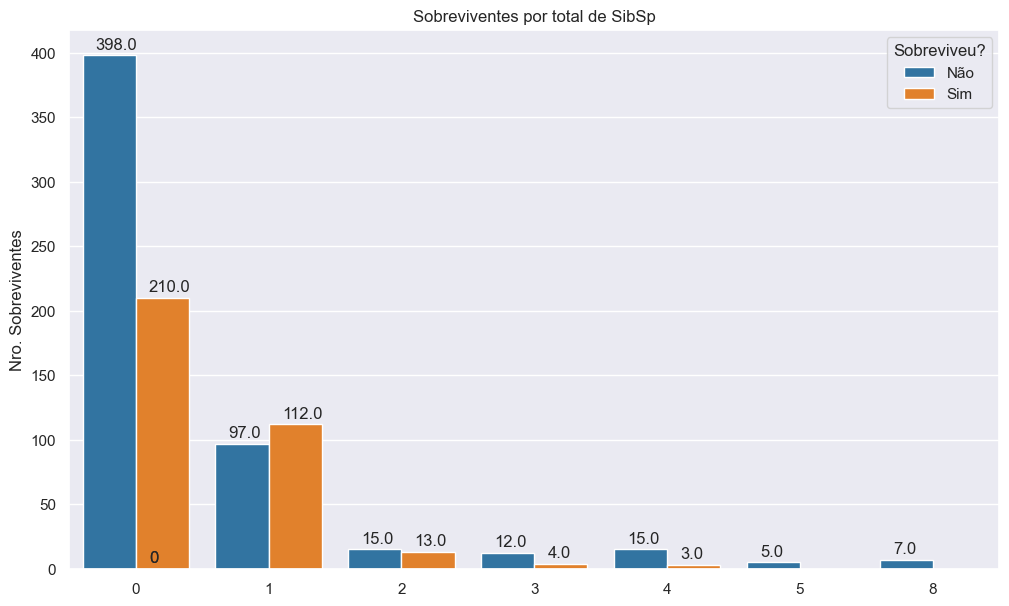

In [22]:
ax = sns.countplot(x = 'SibSp', data=titanic, hue='Survived')
plt.title("Sobreviventes por total de SibSp")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.show();

Será que pessoas com cônjuges ou irmãos têm mais chance de sobreviver? Proporcionalmente aqui parece que sim, mas a base é desbalanceada em favor de pessoas sozinhas.

### `Survived` vs `Parch`

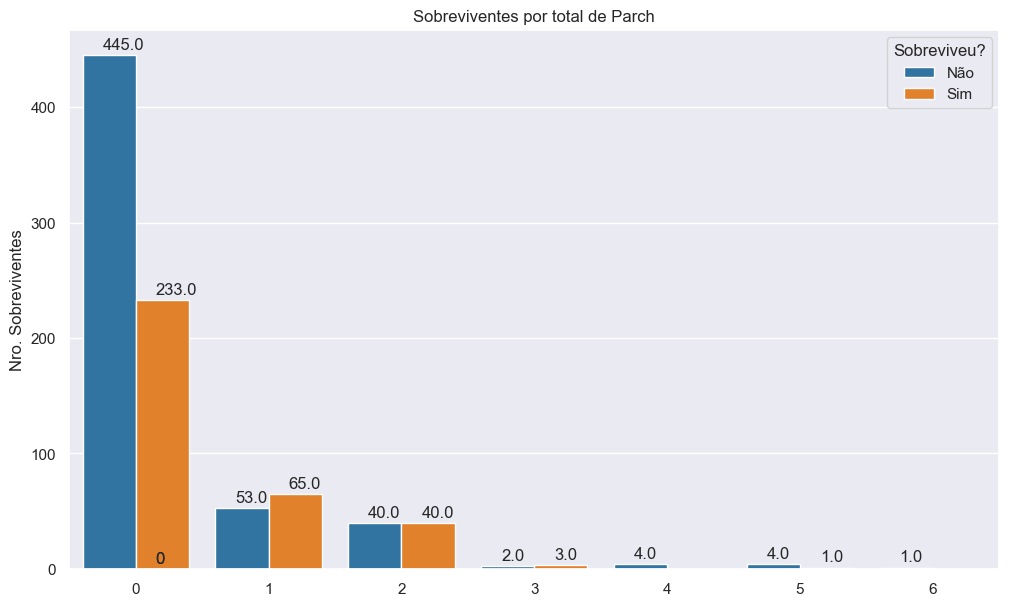

In [23]:
ax = sns.countplot(x = 'Parch', data=titanic, hue='Survived')
plt.title("Sobreviventes por total de Parch")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

Parece existir uma proporção semelhante ao anterior. E para o somatório das duas?

### `Survived` vs `Relateds`

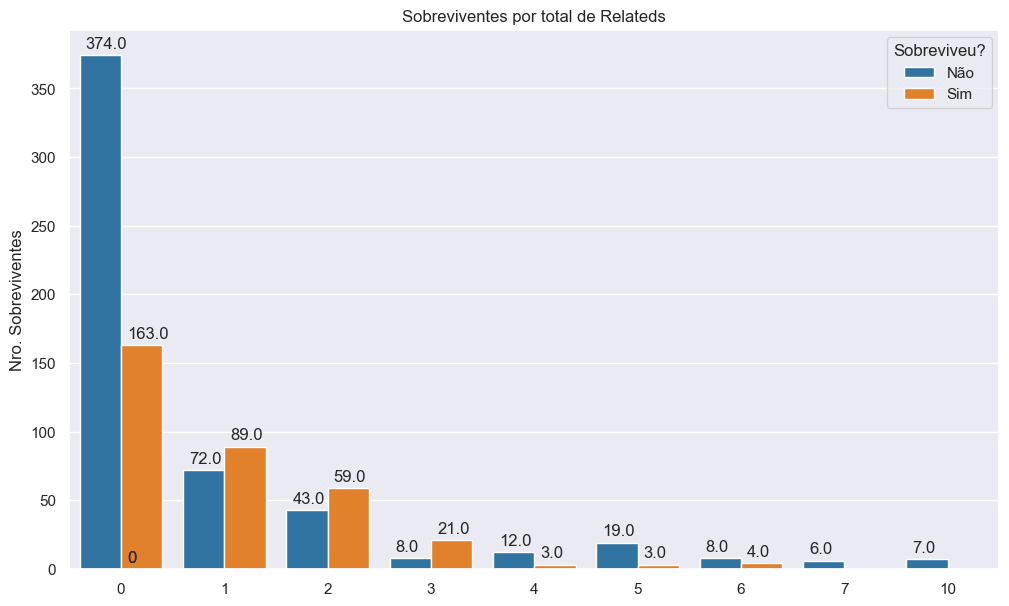

In [24]:
ax = sns.countplot(x = 'Relateds', data=titanic, hue='Survived')
plt.title("Sobreviventes por total de Relateds")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+5))
plt.show();

Realmente parece que aqueles que foram acompanhados (talvez por serem mulheres e crianças) sobreviveram proporcionalmente mais.

### Acompanhados vs Desacompanhados

In [25]:
titanic['acompanhado'] = titanic['Relateds'] > 0
titanic.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria,acompanhado
470,0,3,male,39,0,0,SC,S,0,adulto_idoso,False
130,0,3,male,33,0,0,SC,C,0,adulto_idoso,False
717,1,2,female,27,0,0,E,S,0,adulto_idoso,False


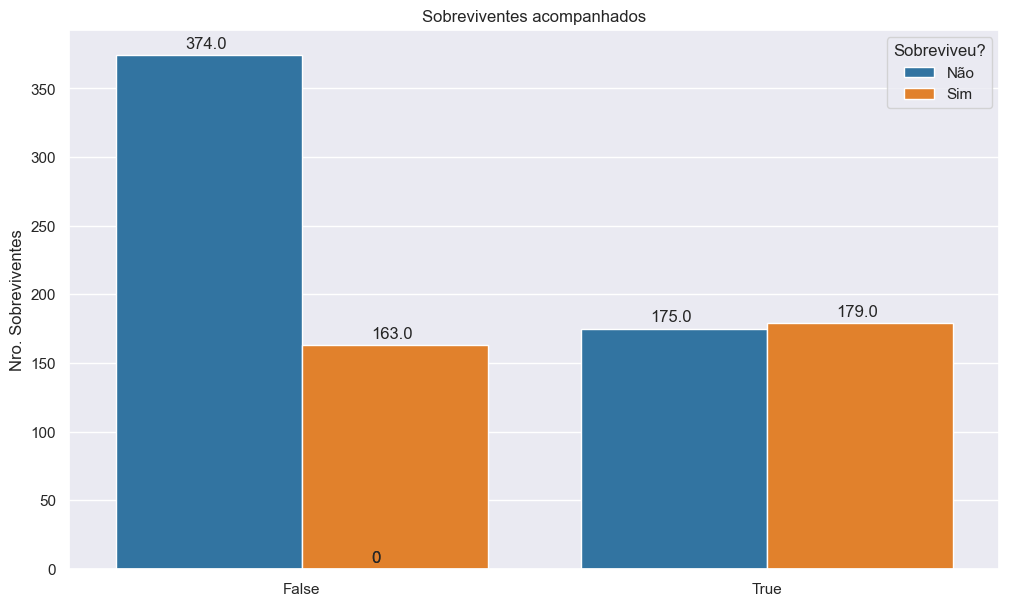

In [26]:
ax = sns.countplot(x = 'acompanhado', data=titanic, hue='Survived')
plt.title("Sobreviventes acompanhados")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show();

Em números brutos sobreviveram mais pessoas acompanhadas que desacompanhadas, assim como proporcionalmente. E se eu considerar também junto o sexo?

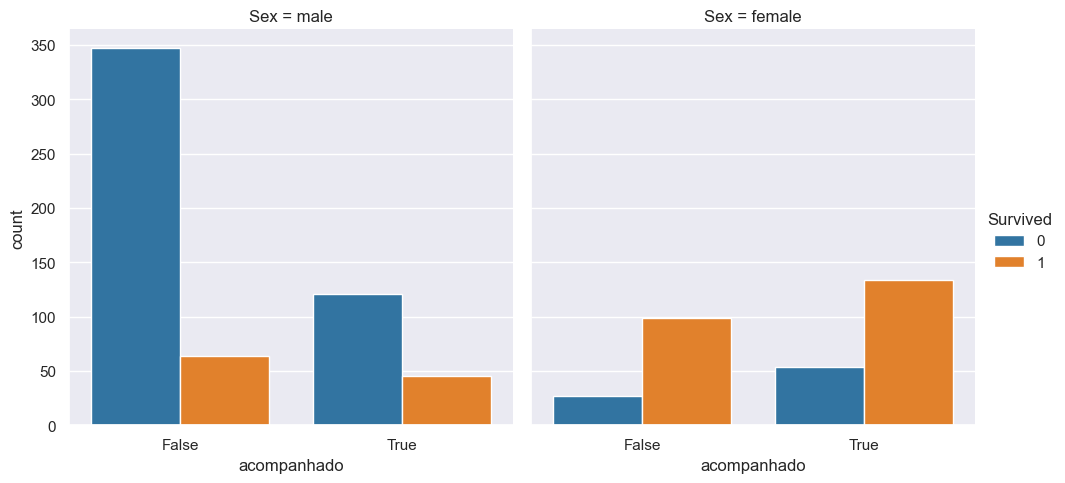

In [27]:
sns.catplot(x="acompanhado", hue="Survived", col="Sex", data=titanic, kind="count");

E por faixa etária?

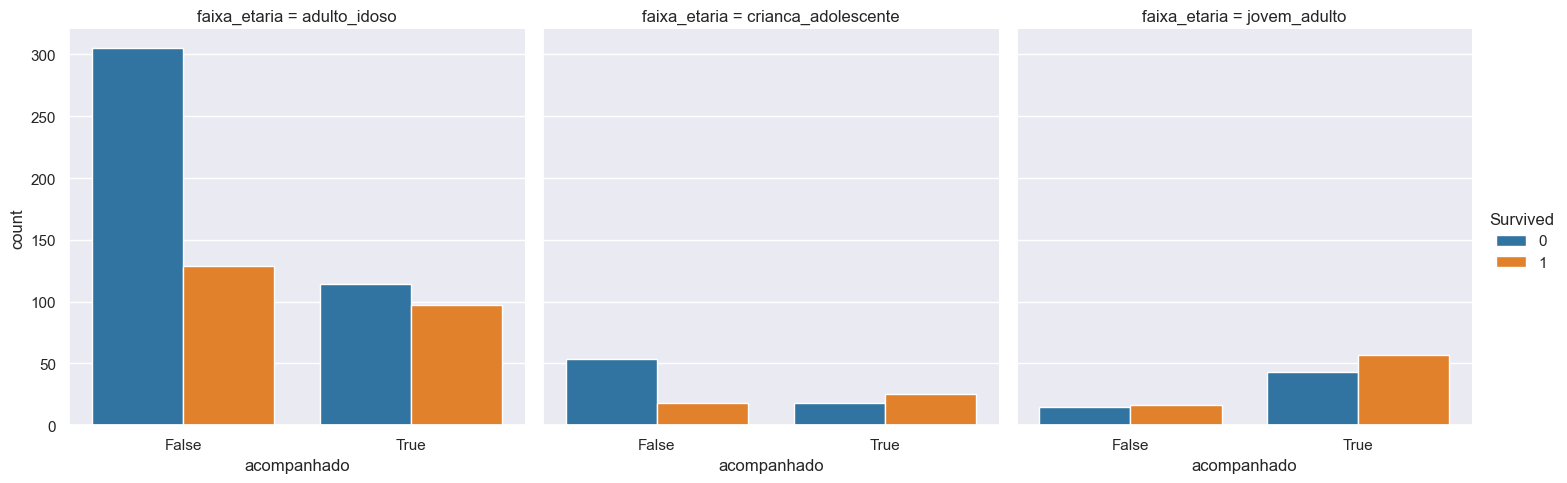

In [28]:
sns.catplot(x="acompanhado", hue="Survived", col="faixa_etaria", data=titanic, kind="count");

Quase não existiam crianças desacompanhadas e a maior parte das crianças, no geral, sobreviveu. A proporção dos mais idosos favoreceu a sobrevivência dos acompanhados, assim como para os jovens adultos. Além disso, ao se incluir o sexo como variável é notável que a maior parte das mulheres está acompanhada e muitos homens estão sozinhos. Então sobreviveram tanto por serem mulheres quanto por estarem acompanhadas? Ou o acompanhado, para este caso, é uma variável _dependente_?

### `Survived` vs `Floor`

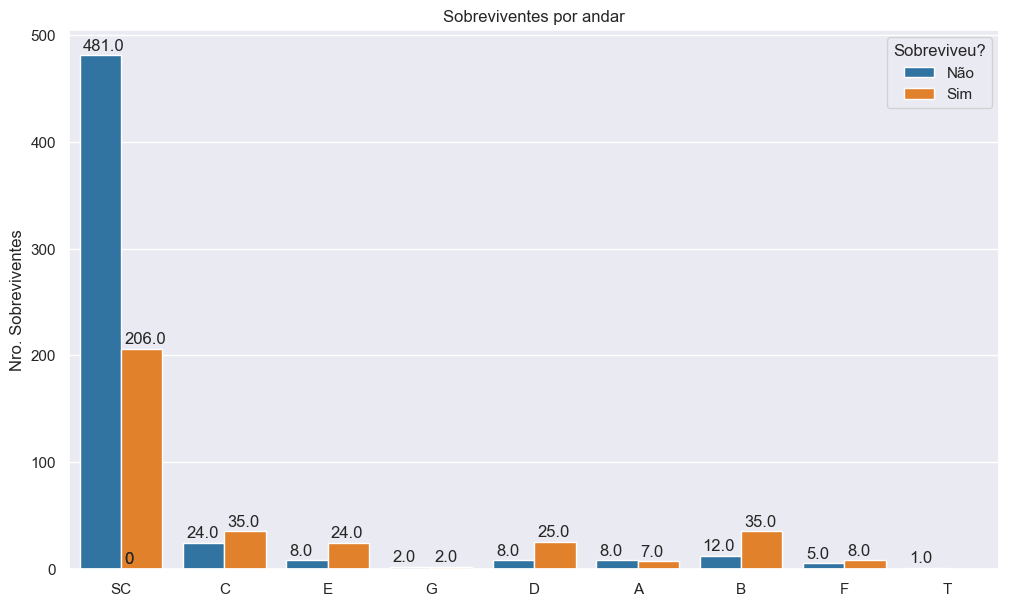

In [29]:
ax = sns.countplot(x = 'Floor', data=titanic, hue='Survived')
plt.title("Sobreviventes por andar")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+5))
plt.show();

O gráfico acima parece mostrar que a maioria dos que possuiam cabine sobreviveram. Para ver melhor, vamos retirar os registros `SC`:

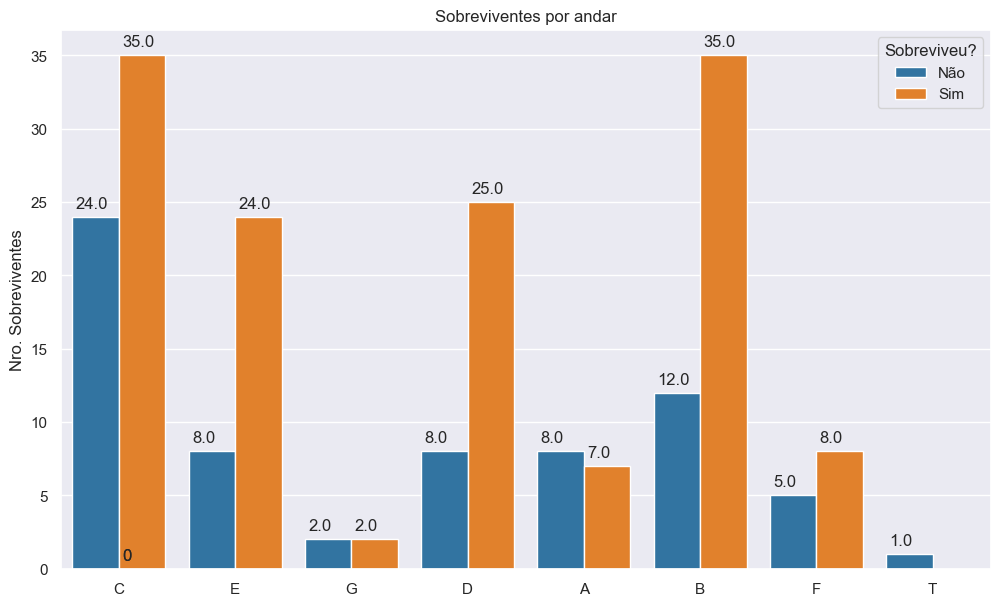

In [30]:
ax = sns.countplot(x = 'Floor', data=titanic.query('Floor != "SC"'), hue='Survived')
plt.title("Sobreviventes por andar")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.6))
plt.show();

Realmente, mesmo considerando os andares A, G e T, a chance de sobrevivência dos que possuiam cabine é bem maior. Vamos comparar com e sem cabine:

In [31]:
titanic['possui_cabine'] = titanic['Floor'] != 'SC'
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria,acompanhado,possui_cabine
90,0,3,male,29,0,0,SC,S,0,adulto_idoso,False,False
588,0,3,male,22,0,0,SC,S,0,adulto_idoso,False,False
769,0,3,male,32,0,0,SC,S,0,adulto_idoso,False,False
413,0,2,male,26,0,0,SC,S,0,adulto_idoso,False,False
557,0,1,male,35,0,0,SC,C,0,adulto_idoso,False,False


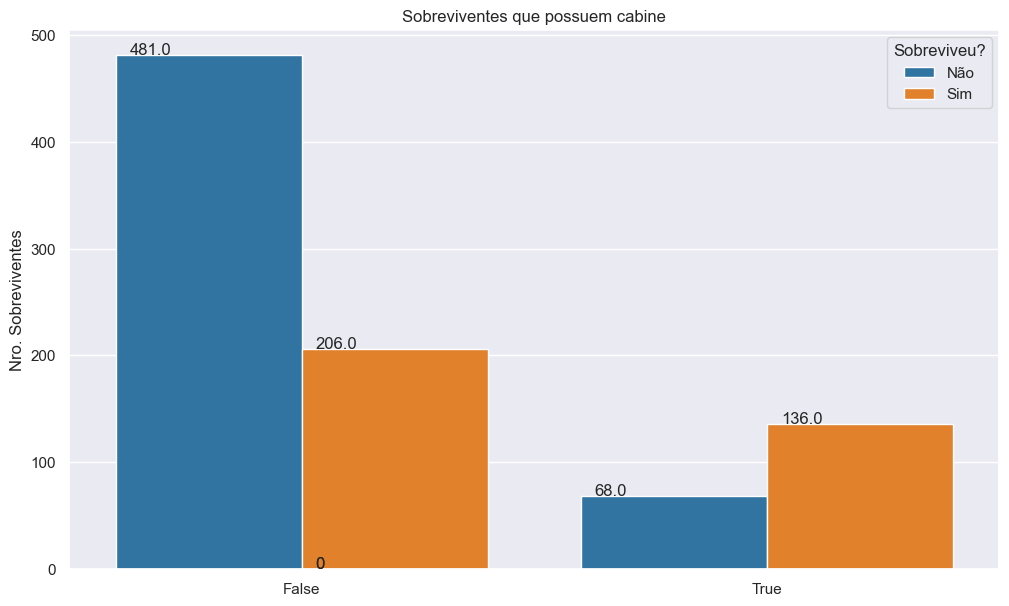

In [32]:
ax = sns.countplot(x = 'possui_cabine', data=titanic, hue='Survived')
plt.title("Sobreviventes que possuem cabine")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.6))
plt.show();

Parece que ter uma cabine aumentou a chance de sobrevivência. Podemos lembrar que existe uma relação entre possuir cabine e a classe.

### `Survived` vs `Embarked`

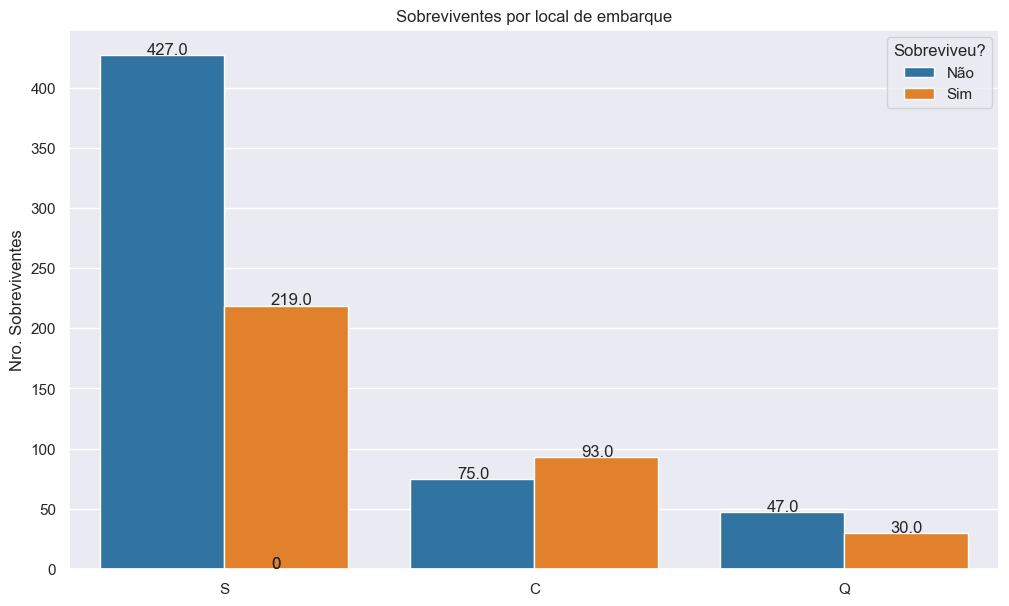

In [33]:
ax = sns.countplot(x = 'Embarked', data=titanic, hue='Survived')
plt.title("Sobreviventes por local de embarque")
plt.legend(['Não', 'Sim'], title="Sobreviveu?")
plt.xlabel('')
plt.ylabel('Nro. Sobreviventes')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.6))
plt.show();

O local de embarque está desbalanceado. Grande parte das pessoas embarcou em _S_ e a maioria não sobreviveu (tanto de _S_ quanto no geral). Em C a maioria sobreviveu mas não em Q. Em nível de "negócio" o porto não parece fazer diferença, especiamlente para aplicar uma árvore de decisão. Isso nem sempre quer dizer que essa variável não terá impacto no resultado, mas que pode ser um viés desnecessário no modelo. Em casos reais isso precisa ser considerado seriamente com dados como "cor" ou "CEP".

## Conclusão

Depois de todo o conhecimento adquirido os modelos de ML que serão gerados podem ter uma precisão melhor. Finalizarei removendo a coluna do local de embarque pois, em nível de negócio, ela n interfere. Dependendo do resultado final do modelo isso pode ser ainda alterado.

In [34]:
del titanic['Embarked']

In [35]:
titanic.to_csv('../data/processed/train_processed_byage_ag.csv')